In [ ]:
import h5py
import nrrd
import os
import numpy as np

# --- PATHS ---
path_neuropal_h5 = "/store1/candy/prj_starvation/data_processed/2025-04-09-01_output/neuropal_label/autolabel_data/NeuroPAL.h5"
path_roi_h5 = "/store1/candy/prj_starvation/data_processed/2025-04-09-01_output/neuropal_label/neuron_rois_cropped.h5"
path_roi_nrrd = "/store1/candy/prj_starvation/data_processed/2025-04-09-01_output/neuropal_label/neuron_rois.nrrd"

# Global variables to hold data after files are closed
h5_rois = {}
h5_neuropal = {}
nrrd_data = None

# --- 1. Load ROI H5 ---
load_h5_to_memory(path_roi_h5, h5_rois)

# --- 2. Load NeuroPAL H5 ---
load_h5_to_memory(path_neuropal_h5, h5_neuropal)

# --- 3. Load NRRD File ---
if os.path.exists(path_roi_nrrd):
    nrrd_data, nrrd_header = nrrd.read(path_roi_nrrd)
    print(f"\nLoaded NRRD: {os.path.basename(path_roi_nrrd)}")
    print(f"  Shape: {nrrd_data.shape}")
else:
    print(f"File not found: {path_roi_nrrd}")

# --- 4. Verification ---
print("\n--- Post-Closure Access Check ---")
if h5_neuropal:
    first_key = list(h5_neuropal.keys())[0]
    print(f"NeuroPAL '{first_key}' is ready. Shape: {h5_neuropal[first_key].shape}")

if h5_rois:
    first_key = list(h5_rois.keys())[0]
    print(f"ROI '{first_key}' is ready. Shape: {h5_rois[first_key].shape}")

Loaded 'roi' from neuron_rois_cropped.h5
  Final Shape: (284, 120, 64)
Loaded 'raw' from NeuroPAL.h5
  Final Shape: (4, 64, 120, 284)

Loaded NRRD: neuron_rois.nrrd
  Shape: (284, 120, 64)

--- Post-Closure Access Check ---
NeuroPAL 'raw' is ready. Shape: (4, 64, 120, 284)
ROI 'roi' is ready. Shape: (284, 120, 64)


In [30]:
h5_rois['roi'].shape

(284, 120, 64)

In [33]:
h5_neuropal['raw'].shape

(4, 64, 120, 284)

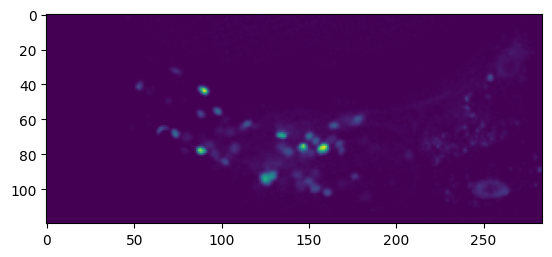

In [38]:
plt.imshow(h5_neuropal['raw'][3,32])

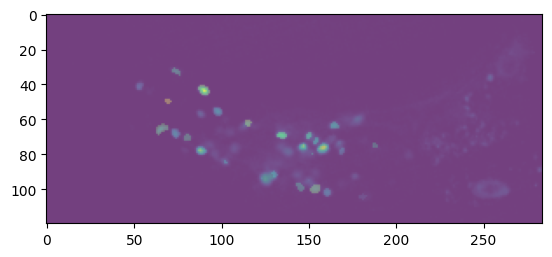

In [45]:
import matplotlib.pyplot as plt
plt.imshow(h5_rois['roi'][...,32].T, alpha=0.5)
plt.imshow(h5_neuropal['raw'][-1,32], alpha=0.5)

Text(0.5, 1.0, 'Trace original for ROI 148\nROI registration confidence = 35.18')

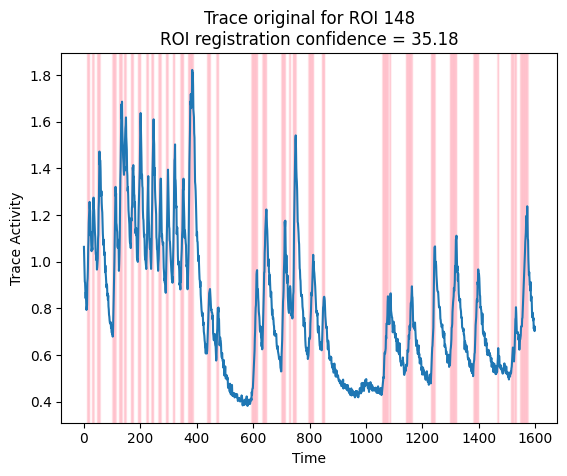

In [20]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

path_processed_h5 = "/store1/shared/flv_utils_data/prj_starvation/processed_h5/2023-05-26-08-data.h5"
with h5py.File(path_processed_h5, 'r') as f:
    # Access and load data into memory with [:]
    reversal_vec = f['behavior/reversal_vec'][:]
    trace_array_original = f['gcamp/trace_array_original'][:]
    roi_match = f['neuropal_registration/roi_match'][:]
    roi_match_confidence = f['neuropal_registration/roi_match_confidence'][:]


target_roi_id = 148
trace_idx = roi_match[target_roi_id-1]             # julia -> python indexing
plt.plot(trace_array_original[..., trace_idx-1])   # julia -> python indexing

# Add pink vertical stripes where reversal_vec == 1
reversal_indices = np.where(reversal_vec == 1)[0]
for idx in reversal_indices:
    plt.axvspan(idx, idx + 1, color='pink', alpha=0.3)

plt.xlabel('Time')
plt.ylabel('Trace Activity')
plt.title(f'Trace original for ROI {target_roi_id}\nROI registration confidence = {roi_match_confidence[target_roi_id]:.2f}')

In [24]:
roi_match

array([  1, 100, 142,  28, 137,   0,  52,   0,  85, 113,  23,  72,  77,
         0, 149,  91,   0,  67,   8,  96, 128, 115,   0,  45,  81,  90,
         0, 126,  57,  80,  33,  88, 110,   0, 154, 136,  27,  55,   0,
       103, 119, 107, 123, 114, 106,  32,  60, 152,  12, 117,   0,  69,
         5, 139,  41,  70,  68, 132,  58,  78,  15,   0,   0,  75, 120,
         0,  43, 125,   0, 105,  42,   0,  93, 127,  16,  34, 112,  66,
       147, 140,  61,   7, 138,  11, 141,   0,  24,  31,  48,  39,  22,
         0, 118,   0,  37,  89,   4,  87,   0,   3,  26,  99,   0, 102,
        53,   0,  63,   0,  83,  10,  51,   0, 111, 130, 104,  62, 148,
        36,  46,  17,  21,  95,  18,   2,  98,  44,  64,   0, 108,  19,
        71,  92,   6,   0,   0,   0,  14, 135, 133,   0,   0, 129,   0,
        74, 124, 144, 122,  97,  54,   9, 116,   0,  65,   0, 101,  38,
        94, 109, 150,  25, 146,  56,  76, 151,  59,  73,   0, 121,   0,
        13,   0,  86,  84,   0,  40,  79,   0,   0, 131,  50,  8

In [25]:
roi_match[100]

np.int64(26)

In [21]:
# import h5py

# path_processed_h5 = "/store1/shared/flv_utils_data/prj_starvation/processed_h5/2025-04-09-01-data.h5"

# def print_structure(name, obj):
#     if isinstance(obj, h5py.Dataset):
#         print(f"{name}: {obj.shape} {obj.dtype}")
#     elif isinstance(obj, h5py.Group):
#         print(f"{name}: <Group>")

# with h5py.File(path_processed_h5, 'r') as f:
#     print("Complete H5 file structure:")
#     print("=" * 60)
#     f.visititems(print_structure)

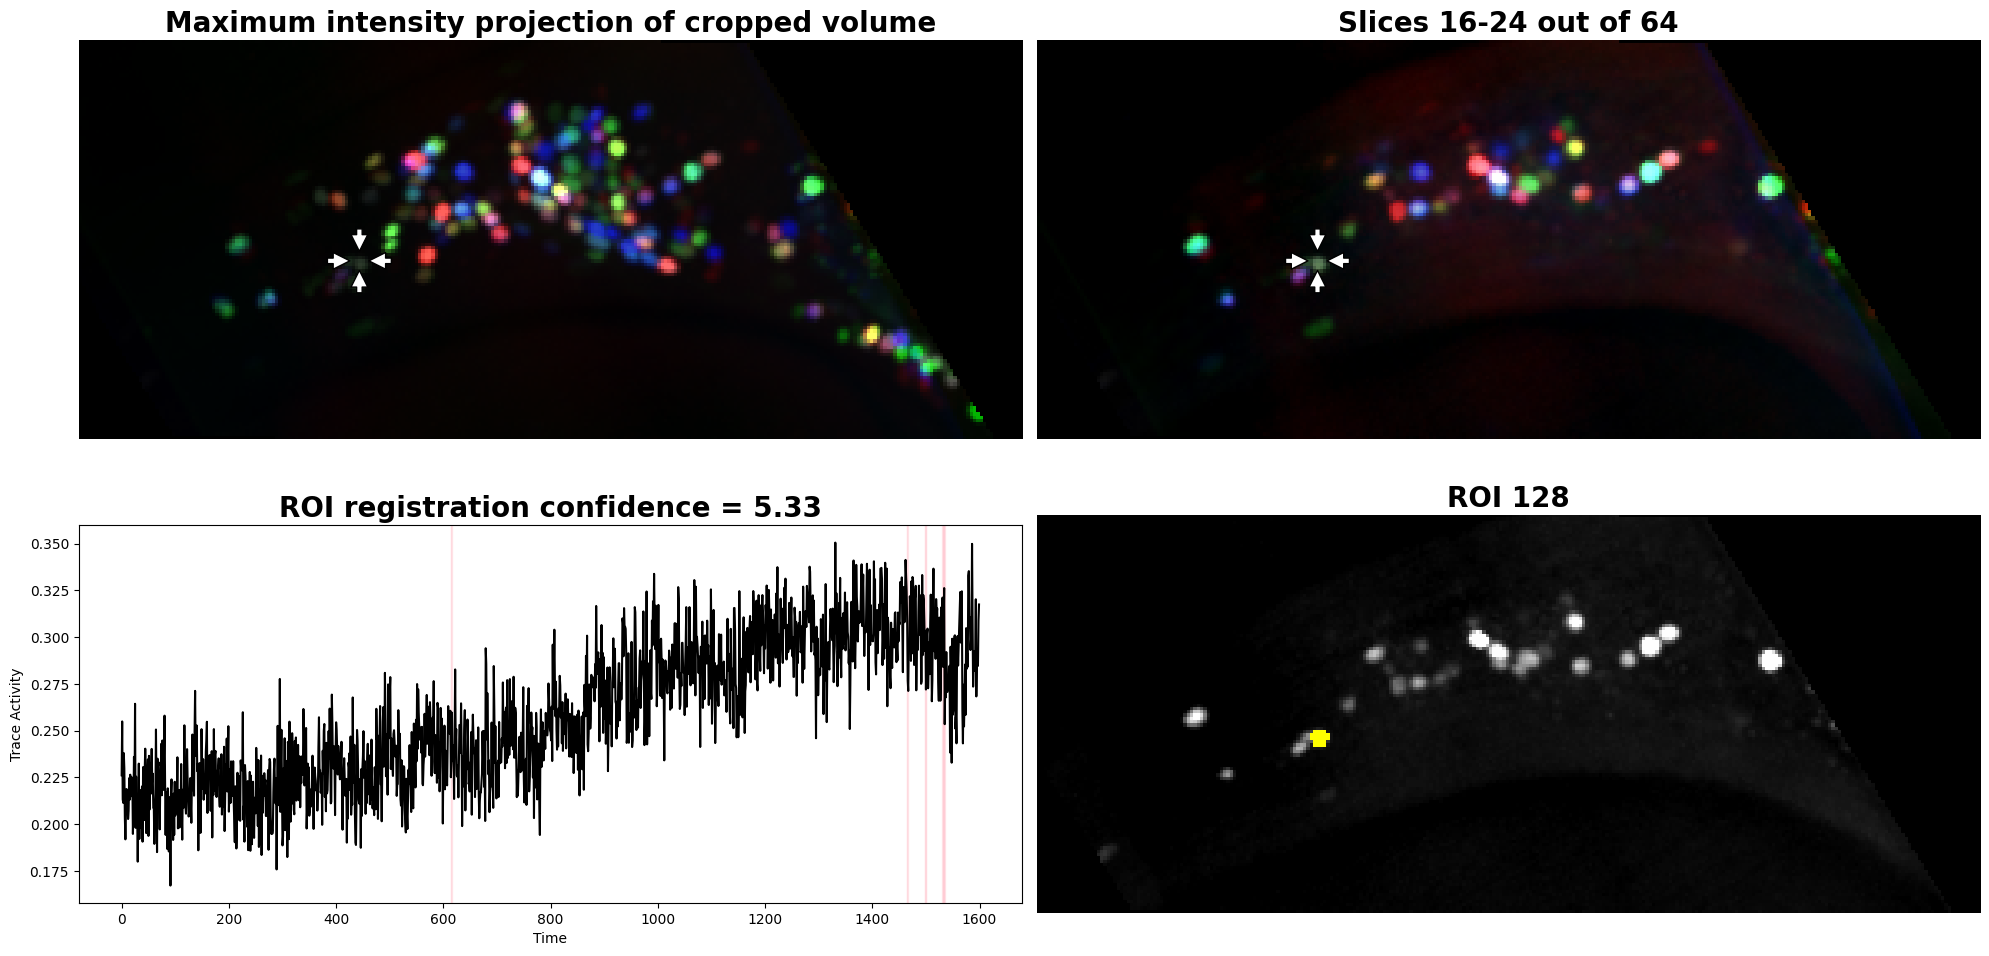

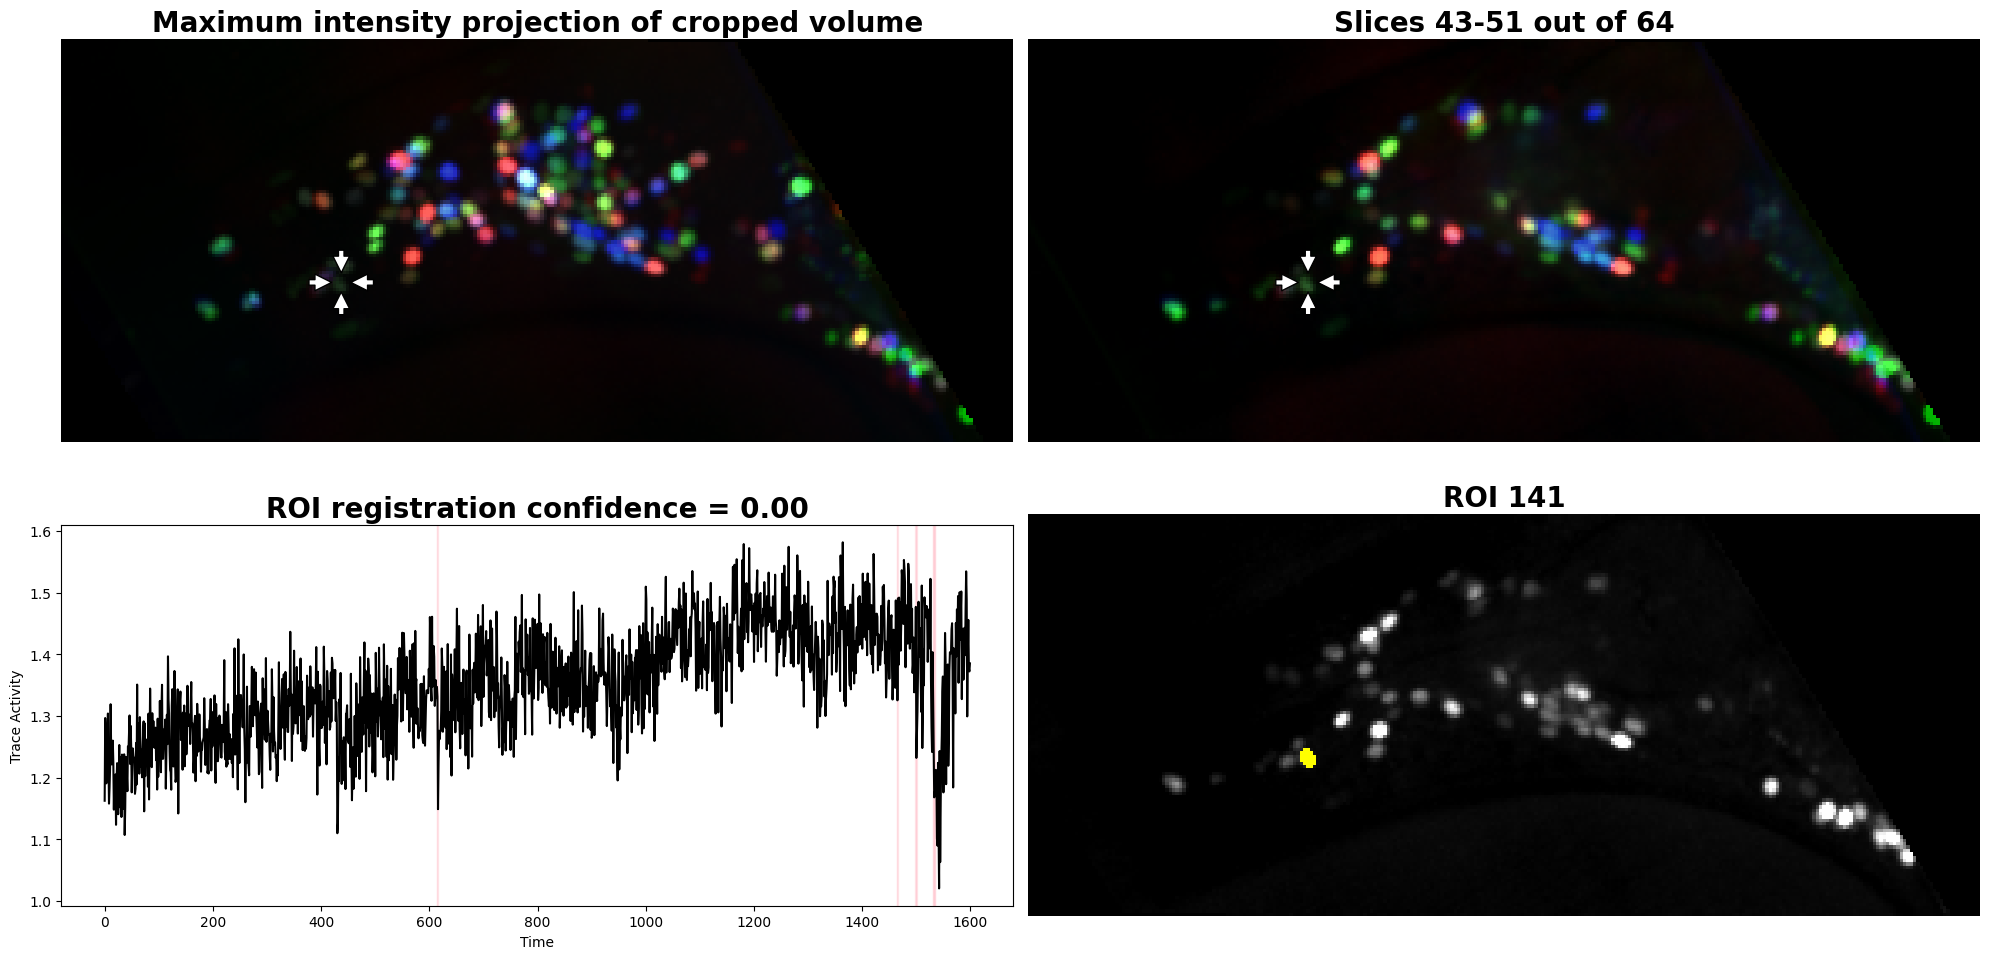

In [4]:
import pandas as pd
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

# --- 1. CONFIGURATION & PATHS ---
flv_utils_data_dir = "/store1/shared/flv_utils_data/"
prj_name = "prj_gfpneuropal"
query = 'NSM'
z_window = 8  # Total slices to include in the thin MIP
prj_root = f"{flv_utils_data_dir}/{prj_name}/"

data_uid = "2025-03-15-15"
path_neuropal_h5  = os.path.join(prj_root, f"autolabel_data/{data_uid}-NeuroPAL.h5")
path_roi_h5       = os.path.join(prj_root, f"neuron_rois/{data_uid}-roi.h5")
path_processed_h5 = os.path.join(prj_root, f"processed_h5/{data_uid}-data.h5")
path_labels_csv   = os.path.join(prj_root, f"labels_csv/{data_uid}.csv")

# path_neuropal_h5 = "/store1/candy/prj_starvation/data_processed/2025-04-09-08_output/neuropal_label/autolabel_data/NeuroPAL.h5"
# path_roi_h5 = "/store1/candy/prj_starvation/data_processed/2025-04-09-08_output/neuropal_label/neuron_rois_cropped.h5"
# path_processed_h5 = "/store1/shared/flv_utils_data/prj_starvation/processed_h5/2025-04-09-08-data.h5"
# path_labels_csv = "/store1/shared/flv_utils_data/prj_starvation/labels_csv/2025-04-09-08.csv"

# --- 2. CORE FUNCTIONS ---
def normalize(arr, lower_percentile=5, upper_percentile=99.7):
    """Robust scaling to handle hot pixels/outliers."""
    if arr.size == 0: return arr
    p_low, p_high = np.percentile(arr, [lower_percentile, upper_percentile])
    if p_high == p_low: return np.zeros_like(arr)
    arr_clipped = np.clip(arr, p_low, p_high)
    return (arr_clipped - p_low) / (p_high - p_low + 1e-5)

def create_composite_mip(neuropal_data, roi_volume, target_roi_id):
    """
    neuropal_data: (4, Z, Y, X)
    roi_volume: (Z, Y, X)
    """
    # 1. NeuroPAL MIP along Z (axis 1) -> (4, 120, 284)
    mip_channels = np.max(neuropal_data, axis=1)
    
    r = normalize(mip_channels[0])
    g = normalize(mip_channels[1])
    b = normalize(mip_channels[2])
    struct = normalize(mip_channels[3])
    
    # Base RGB is (120, 284, 3)
    rgb_base = np.stack([r, g, b], axis=-1)
    
    # 2. ROI MIP along Z (axis 0) -> (120, 284)
    roi_binary = (roi_volume == target_roi_id).astype(float)
    roi_mip = np.max(roi_binary, axis=0)
    
    # Yellow Highlight (Red + Green)
    yellow_overlay = np.stack([roi_mip, roi_mip, np.zeros_like(roi_mip)], axis=-1)
    
    return rgb_base, struct, yellow_overlay

def prepare_plot_data(rgb, struct, yellow):
    """Blends layers into final (120, 284, 3) images for imshow."""
    s_rgb = np.stack([struct] * 3, axis=-1)
    context = (rgb * 0.7) + (s_rgb * 0.3)
    h_mask = yellow[..., 0:1] > 0
    # Strict broadcasting: all arrays are (120, 284, 3)
    loc = np.where(h_mask, yellow, s_rgb)
    return context, loc

# --- 3. DATA LOADING ---
with h5py.File(path_roi_h5, 'r') as f: h5_rois = {'roi': f['roi'][:]}

with h5py.File(path_neuropal_h5, 'r') as f: h5_neuropal = {'raw': f['raw'][:]}

with h5py.File(path_processed_h5, 'r') as f:
    reversal_vec = f['behavior/reversal_vec'][:]
    traces_array_original = f['gcamp/trace_array_original'][:]
    roi_match = f['neuropal_registration/roi_match'][:]
    roi_match_confidence = f['neuropal_registration/roi_match_confidence'][:]

if os.path.exists(path_labels_csv):
    df_labels = pd.read_csv(path_labels_csv)
else:
    df_labels = None
    print("Error: labels.csv not found.")

# --- 4. MAIN VISUALIZATION LOOP ---
if df_labels is not None:
    matches = df_labels[df_labels['Neuron Class'].str.startswith(query, na=False)]
    
    for _, row in matches.iterrows():
        roi_id = int(row['ROI ID'])
        roi_coord = row['Coordinates']
        neuron_name = row['Neuron Class']
        
        # Centroid Calculation based on (Z, Y, X) shape
        coords = np.argwhere(h5_rois['roi'] == roi_id)
        if coords.size == 0: continue
        z_c, y_c, x_c = coords.mean(axis=0).astype(int)

        # A. Create Full MIP Data
        rgb_f, struct_f, yellow_f = create_composite_mip(h5_neuropal['raw'], h5_rois['roi'], roi_id)
        
        # B. Create Thin MIP Data (Slice depth: 64)
        half = z_window // 2
        z_s = np.clip(z_c - half, 0, 63)
        z_e = np.clip(z_c + half, z_s + 1, 64)
        
        t_raw = h5_neuropal['raw'][:, z_s:z_e, :, :]
        t_roi = h5_rois['roi'][z_s:z_e, :, :]
        
        rgb_t, struct_t, yellow_t = create_composite_mip(t_raw, t_roi, roi_id)

        # C. Process for Display
        full_ctx, _ = prepare_plot_data(rgb_f, struct_f, yellow_f)
        thin_ctx, thin_loc = prepare_plot_data(rgb_t, struct_t, yellow_t)

        # D. Plotting (2x2 Grid)
        fig, axes = plt.subplots(2, 2, figsize=(20, 10))
        ax1, ax2 = axes[0] # Top: Full | Thin
        ax3, ax4 = axes[1] # Bottom: Trace | Localization

        # Your Saved Arrow Settings
        gap, length = 2.5, 7.5
        tail_dist = gap + length
        arrow_style = dict(facecolor='white', edgecolor='black', width=4, headwidth=12, shrink=0.05)
        
        # Horizontal (X) is x_c, Vertical (Y) is y_c
        fx, fy = x_c, y_c

        def draw_arrows(ax):
            ax.annotate('', xy=(fx, fy-gap), xytext=(fx, fy-tail_dist), arrowprops=arrow_style)
            ax.annotate('', xy=(fx, fy+gap), xytext=(fx, fy+tail_dist), arrowprops=arrow_style)
            ax.annotate('', xy=(fx-gap, fy), xytext=(fx-tail_dist, fy), arrowprops=arrow_style)
            ax.annotate('', xy=(fx+gap, fy), xytext=(fx+tail_dist, fy), arrowprops=arrow_style)

        # 1. Full MIP
        ax1.imshow(np.clip(full_ctx, 0, 1))
        ax1.set_title(f"Maximum intensity projection of cropped volume", fontsize=20, fontweight='bold')
        draw_arrows(ax1)
        ax1.axis('off')

        # 2. Thin MIP
        ax2.imshow(np.clip(thin_ctx, 0, 1))
        ax2.set_title(f"Slices {z_s}-{z_e} out of 64", fontsize=20, fontweight='bold')
        draw_arrows(ax2)
        ax2.axis('off')

        # 3. GCaMP Trace & Reversals (Bottom Left)
        trace_idx = roi_match[roi_id-1]                                                   # julia -> python indexing
        ax3.plot(traces_array_original[..., trace_idx-1], color='black', linewidth=1.5)   # julia -> python indexing
        ax3.set_box_aspect(0.4)
        reversal_indices = np.where(reversal_vec == 1)[0]
        for idx in reversal_indices:
            ax3.axvspan(idx, idx + 1, color='pink', alpha=0.3)
        ax3.set_xlabel('Time')
        ax3.set_ylabel('Trace Activity')
        conf = roi_match_confidence[roi_id]
        ax3.set_title(f'ROI registration confidence = {conf:.2f}', fontsize=20, fontweight='bold')

        # 4. Thin Localization (Bottom Right)
        ax4.imshow(np.clip(thin_loc, 0, 1))
        ax4.set_title(f"ROI {roi_id}", fontsize=20, fontweight='bold')
        ax4.axis('off')

        plt.tight_layout()
        plt.show()

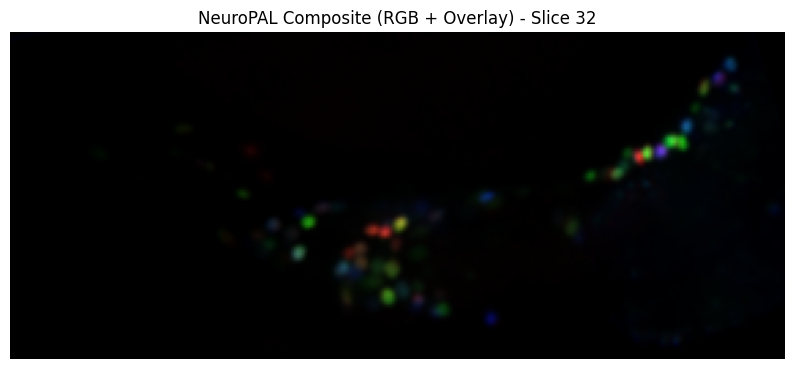

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# slice = 50

# # 1. Extract the slice (slice 32) for all 4 channels
# # Assuming shape is (Channel, Z, Y, X)
# c0 = h5_neuropal['raw'][0, slice]
# c1 = h5_neuropal['raw'][1, slice]
# c2 = h5_neuropal['raw'][2, slice]
# c3 = h5_neuropal['raw'][3, slice]

# # 2. Normalize the data (Crucial for st.image or plt.imshow)
# # This scales values to 0.0 - 1.0 based on the brightness of that slice
# def norm(arr):
#     return (arr - arr.min()) / (arr.max() - arr.min() + 1e-5)

# # 3. Create the RGB base
# # np.stack merges the 2D arrays into a 3D (Y, X, 3) array
# rgb_base = np.stack([norm(c0), norm(c1), norm(c2)], axis=-1)

# # 4. Display
# plt.figure(figsize=(10, 8))

# # Show the RGB channels first
# plt.imshow(rgb_base)

# # Overlay the 4th channel (structural) 
# # We use the 'gray' colormap and low alpha to make it look like a pale white "glow"
# plt.imshow(norm(c3), cmap='gray', alpha=0.2)

# plt.title(f"NeuroPAL Composite (RGB + Overlay) - Slice 32")
# plt.axis('off')
# plt.show()

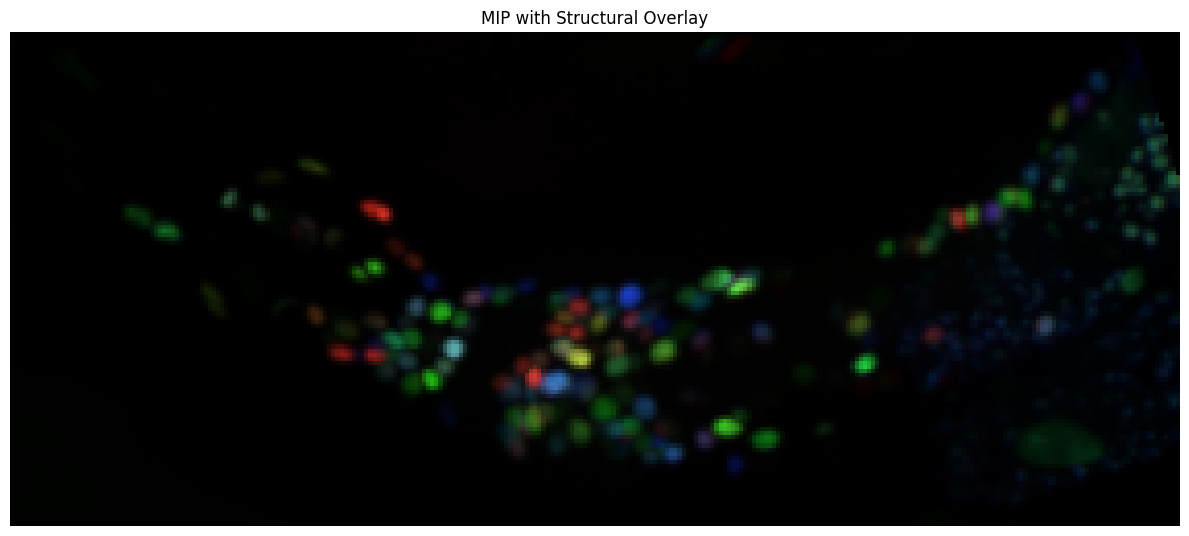

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# def get_mip_composite(data_4d, structural_alpha=0.3):
#     """
#     Creates an RGB + Structural Overlay MIP.
#     Assumes data_4d shape is (Channels, Z, Y, X)
#     """
#     # 1. Calculate MIP for each channel along the Z-axis (axis=1)
#     # This turns (4, 64, 120, 284) -> (4, 120, 284)
#     mip_channels = np.max(data_4d, axis=1)
    
#     # 2. Helper to normalize for visualization
#     def norm(arr):
#         return (arr - arr.min()) / (arr.max() - arr.min() + 1e-5)

#     # 3. Separate the channels
#     r_mip = norm(mip_channels[0])
#     g_mip = norm(mip_channels[1])
#     b_mip = norm(mip_channels[2])
#     struct_mip = norm(mip_channels[3])

#     # 4. Create RGB Base
#     rgb_mip = np.stack([r_mip, g_mip, b_mip], axis=-1)

#     return rgb_mip, struct_mip

# # --- Execution ---
# # Using your h5_neuropal data
# rgb_mip, struct_mip = get_mip_composite(h5_neuropal['raw'])

# # --- Visualization ---
# plt.figure(figsize=(12, 6))
# plt.imshow(rgb_mip)
# plt.imshow(struct_mip, cmap='gray', alpha=0.3) # The "pale white" overlay
# plt.title("MIP with Structural Overlay")
# plt.axis('off')

# plt.tight_layout()
# plt.show()

In [22]:
(h5_data['roi'].transpose(2, 1, 0) == nrrd_data).mean()

np.float64(1.0)